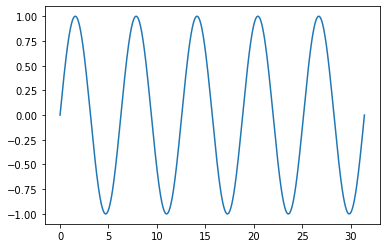

In [2]:
#check if everything is working well
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10*np.pi, 1000)
y = np.sin(x)

plt.plot(x, y)


In [26]:
#Starting the Classification problem
#in this problem, we´ll build a model to predict if a given image
#is cancerigenous as well as the stage of the cancer


import tensorflow as tf

In [27]:
print(tf.__version__)

2.3.0


In [6]:
from sklearn.datasets import load_breast_cancer

In [7]:
data = load_breast_cancer()
type(data)

sklearn.utils.Bunch

In [8]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [11]:
data.data.shape


(569, 30)

In [12]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [13]:
data.target_names


array(['malignant', 'benign'], dtype='<U9')

In [14]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D =X_train.shape

In [16]:
#scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [19]:
#putting all together
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model.compile(optimizer = "adam", loss="binary_crossentropy",
              metrics=["accuracy"])

r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

#Evaluate the model - evaluate() returns loss and accuracy
print("Train score: ", model.evaluate(X_train, y_train))
print("Test score: ", model.evaluate(X_test, y_test))

Epoch 1/100
12/12 [==============================] - 0s 10ms/step - loss: 0.7920 - accuracy: 0.5302 - val_loss: 0.8025 - val_accuracy: 0.5532
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 0.7238 - accuracy: 0.5669 - val_loss: 0.7395 - val_accuracy: 0.5904
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6611 - accuracy: 0.6194 - val_loss: 0.6853 - val_accuracy: 0.6223
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6086 - accuracy: 0.6719 - val_loss: 0.6373 - val_accuracy: 0.6489
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 0.5620 - accuracy: 0.7060 - val_loss: 0.5958 - val_accuracy: 0.6968
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 0.5224 - accuracy: 0.7454 - val_loss: 0.5590 - val_accuracy: 0.7500
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 0.4868 - accuracy: 0.7664 - val_loss: 0.5271 - val_accuracy: 0.7660
Epoch 8/100


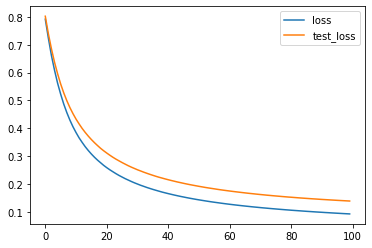

In [22]:
#plot what´s returned by model.fit()
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'test_loss')
plt.legend()

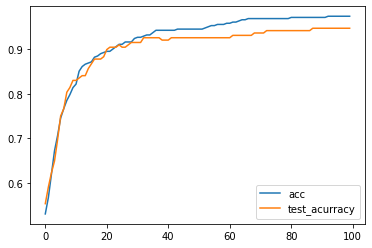

In [24]:
#plot the accuracy as well
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='test_acurracy')
plt.legend()

In [ ]:
#End of this Classification problem